In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET (1).csv')
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
data.FullDate = pd.to_datetime(data.FullDate)
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
data.set_index('FullDate', inplace=True)
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Text(0, 0.5, 'ElecPrice')

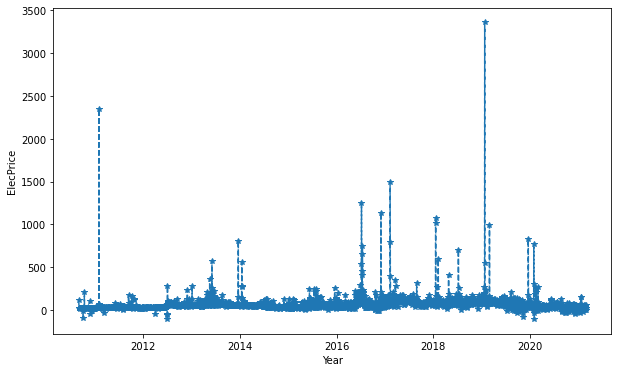

In [5]:
# question 11 
data_D = data.resample('D').mean()
plt.figure(figsize=(10, 6))
plt.plot(data_D.index, data_D.ElecPrice, '--', marker='*')
plt.xlabel('Year')
plt.ylabel('ElecPrice')

In [6]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_D['SysLoad'])
print(f'ADF Statistic :{adf_result[0]}')
print(f'p value :{adf_result[1]}')
print(f'No. of lags used :{adf_result[2]}')
print(f'No. of observations used :{adf_result[3]}')
print('Critical Values;')
for k, v in adf_result[4].items():
    print(f' {k}; {v}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic :-3.6901589888366413
p value :0.0042537255045741835
No. of lags used :30
No. of observations used :3803
Critical Values;
 1%; -3.432070672988693
 5%; -2.8623002987378547
 10%; -2.567174716967499


In [7]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_D['GasPrice'])
print(f'ADF Statistic :{adf_result[0]}')
print(f'p value :{adf_result[1]}')
print(f'No. of lags used :{adf_result[2]}')
print(f'No. of observations used :{adf_result[3]}')
print('Critical Values;')
for k, v in adf_result[4].items():
    print(f' {k}; {v}')

ADF Statistic :-2.902766697165181
p value :0.045027212884625294
No. of lags used :27
No. of observations used :3806
Critical Values;
 1%; -3.4320693157877544
 5%; -2.8622996992165364
 10%; -2.5671743978048323


In [8]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_D['ElecPrice'])
print(f'ADF Statistic :{adf_result[0]}')
print(f'p value :{adf_result[1]}')
print(f'No. of lags used :{adf_result[2]}')
print(f'No. of observations used :{adf_result[3]}')
print('Critical Values;')
for k, v in adf_result[4].items():
    print(f' {k}; {v}')

ADF Statistic :-8.269053866873804
p value :4.848817773711633e-13
No. of lags used :20
No. of observations used :3813
Critical Values;
 1%; -3.432066157296446
 5%; -2.8622983040036005
 10%; -2.5671736550459663


In [9]:
data.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


In [10]:
Day_data = data.asfreq('D')
Day_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,15.8,1688.215,3.69,23.710
2010-09-02,15.4,1733.120,3.69,29.190
2010-09-03,18.3,1637.175,4.45,20.855
2010-09-04,13.7,1658.050,3.39,22.875
2010-09-05,14.9,1536.185,4.45,18.920


In [14]:
from fbprophet import Prophet
dt = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET (1).csv')
dt.FullDate = pd.to_datetime(dt.FullDate)
dt1 = dt.drop(columns=['Tmax', 'SysLoad', 'GasPrice'])
dt2= dt1.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y"})
Day_data = dt2.asfreq('D')
Day_data.head() 

,ds,y
1970-01-01,NaT,NaN


In [12]:
x = len(Day_data)
x

1

In [13]:
training_data = Day_data[:2757]
test_data = Day_data[2757:]
len(training_data) + len(test_data)


1

In [14]:
model = Prophet()
model.fit(Day_data)

ValueError: ignored